In [2]:
# First we start loading our favourite packages with the names we used to
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
# import regression package
import statsmodels.api as sm

# The econometrics of strategy evaluation


Our premise here is that you are lookign to invest in the portfolio wiht the highest Sharpe Ratio. As we discussed in chapter 10, we can always combine such portfolio with the risk-ree rate to achieve the desired volatility/expected return.

**Back to the Tangency portfolio**

* in Chapter 10 we solved the problem 

$$
\begin{aligned}
maximize_{(X)} E[r_p(X)]- \frac{\gamma}{2} Var(r_p(X))\\
\end{aligned}
$$

* And found that the portfolio that solves this problem,i.e., has the highest sharpe ratio among the set of assets that belong in the optimization have the following form

$$ Var(R^e)W^*=\gamma E[R^e]$$

* I.e., the quation above defines $W^*$, the weights of the tangency portfolio

* We can rewirte the left hand side as

$$Var(R^e)W^*=Cov(R^e,R^e)W^*=Cov(R^e,(W^*)'R^e)=Cov(R^e,r^*)$$

* where we use that $r^*=(W^*)'R^e$ is the returns of the tangency protolio 

* The left-hand side in the covariance vector of all the assets with the tangency portfolio, so it is a vector N by 1, where N is the number of assets considered.

* This means that the expected return of an asset must be proportional to the covariance between the return of the asset and the return of the tangency portfolio

$$ E[R^e]=\gamma  Cov(R^e,r^*) $$


* This holds for all assets in your investment opportunity set (i.e. the assets included in the minimization problem that the tangency portfolio solves)


* This means that for any assets $j$ and $i$ we have 


$$\frac{E[r^e_i]}{Cov(r^e_i,R^*)}= \frac{E[r^e_j]}{Cov(R^e_j,R^*)} $$ 


* All assets have the same expected return per-unit of covariance with the tangency portoflio

* We can also apply this to the tangency portfolio itself


$$ E[R^*]=\gamma \times Cov(R^*,R^*) $$


* Which means that $\gamma=\frac{E[R^*]}{Var(R^*)}$


* Plugging back in the original and we get that for any asset $j$


$$ E[r^e_j]=\frac{E[r^*]}{Var(r^*)} Cov(r^e_j,r^*) =\frac{Cov(r^e_j,r^*)}{Var(r^*)}E[r^*]=\beta_{j,*}E[r^*] $$



$$ E[r^e_j]=\beta_{j,*}E[r^*] $$

> **What model you learned in 411 does that remind you?**

* All the information about the cross-sectional of expected returns--all the assets-- can be summarized by the expected return of the tangency portfolio and the beta of each asset with respect to the tangency portfolio

* Or Alternatively: the risk-return trade-off  of the tangency portfolio  $\frac{E[r^*]}{Var(r^*)}$ and the covariance of each asset with it.


* Once you have the right notion of risk, the reward to risk is the same across assets (no free lunch)

* What is the right notion? 

**Covariance of the asset excess return with the tangency portfolio excess returns** 

Or equivalently

**Beta $\beta=\frac{Cov(r^e_j,r^*)}{Var(r^*)}$ of the asset excess return with the tangency portfolio excess returns** 

**What does this mean?**

It means that if a strategy has the highest sharpe ratio among a set of assets/strategies, then it must be the case that this rleationship holds 

$$ E[r^e_j]=\beta_{j,*}E[r^*] $$

This is a linear regression!

It 

**Time-series Test (or alpha test)**

IF we run 

$$r^e_j=\alpha_j +\beta_{j,*}r^*_t +\epsilon_{j,t}$$

- Then this relation predicts that the intercept, the alpha, should be zero

- It is important here that both the test assets and the reference portfolios are all **excess returns**. This makes the test really simple. If you use returns instead the prediction about the intercept will be different because of the risk-free rate

- We refer to these assets on the Left Hand Side of the regression as **Test Assets** and the asset on the right as the **model**, which is the candidate tangency portfolio

- This means that we can use this to test whether a new strategy adds value realtive to another strategy (i.e. the model).

- If the model is "right" than we will fail to reject that the alphas are zero, i.e. the relationship between average returns and betas holds.

**What adding value means?** It means enhancing the portfolio sharpe ratio when combined appropriately with the "tangency" portfolio. Therefore, $r^*$ cannot be tangency!

The way that we will use it is to start with a reference **model portfolio** that with returns $r^p$. This can be the returns of your own portfolio if you have a long sample for it and if you hold a very complicated set of assets. But most people use as the reference portfolio the return on the market portfolio.


**CAPM prediction: Market portfolio is the tangency portfolio**


* The most used reference portfolio is the market portoflio

* So we will do our first alpha test with respect to the market

* The CAPM holds for a set of assets i=1...N if and only if


  $$E[r_{i,t}^e] =\alpha_i+\beta_{i,MKT} E[r_{t}^{MKT,e}]$$
  
  with $\alpha_i=0$ for all assets  i=1...N
 


* So if you put any other portfolio in $r_{t}^{*,e}$ instead of the market, then you are not testing the CAPM. The CAPM is aspecific model that predicts that the market is tangency

* In fact we know that there must be a portfolio * such that

  $$E[r_{i,t}^e] =\beta_{i,*} E[r_{t}^{*,e}]$$
  
  holds , such portfolio is the tangency portfolio
  
 * Why alpha=0 is so special? Because it tells us that the expected return of any of these assets can be captured by varying the exposure to  the tangency  with the minimum increase in risk possible

**Beating the Model**

Academics use this to test if the CAPM is right. Practicioners use this to see if they can beat the CAPM, i.e. **beat the market**. Having an alpha--a postive intercept-- means that you have an average return that is higher than your strategy market risk exposure would predict.

It is very important here that is all about averages, not at all about realized returns. Being tanngency does **NOT** mean that your relaized returns shoudl explain all the other realized returns.

Instead, it means that the betas of the asset with the tangnecy should explain the average return of the asset.

Of course, stuff happens, so even if your reference portfolio is in fact tangency portfolio under the true distribution, it will not be in any particular sample, so we will use statistics to tell us if the $\alpha$ is different enought from zero!




* Test if $\alpha_i \neq 0$

  - It doesn't matter if positive or negative, since you can always go short. 
  - While a particular manager might care to show that thir alpha is positive. Here it is symmetric. So large negative alphas are as good as large positive alphas (or as bad for the referecne portfolio) because you can enhance your Sharpe ratio by shoritng the asset. In reality you might not be able to direct short a mutual fund, but oyu cant try to replicate the opposite of whatever they are doing in case they have a alpha that is negative enough. 

  - You basically do a standard t-test 

  $$t=\frac{\alpha_i }{\sigma(\alpha_i)}$$

* We say

 - if $|t|\geq 1.64$ there is a 10% chance that the market is Tangency (or Mean-Variance Efficient, i.e MVE)
 - if $|t|\geq 1.96$ there is a 5% chance that the market is MVE
 - if $|t|\geq 2.1$ there is a 2.5% chance that the market is MVE
 - if $|t|\geq 2.6$ there is a 1% chance that the market is MVE
 
 
* The Time-series regression asks the following question:
  > Can I replicate  the average return I get in asset $i$ by investing in the reference portfolio?
 
 * Having a non-zero alpha DOES NOT mean that you prefer asset $i$ to the reference portfolio!
 
 * But it does mean, that you can do better by investing in both assets
   - Obviously with a negative weight if the alpha is negative
   - and a positive weight if the alpha is positive
   
 * The alpha test literally asks if the reference portfolio is the tangency portfolio with respect to the investment opportunity that includes the test asset (the asset in the left of the regression) and the reference portfolio (the asset on the right)
 
 * A differet way to put it is that a non-zero alpha means that the asset expands the mean-variance frontier relative to an opportunity set that only has the reference portfolio
  

> Question: I show that Asset A has alpha with respect to Asset B. Does it mean that an investor should prefer asset A to asset B?

**Is the value strategy likely to increase the Sharper Ratio of someone that only hold the market portoflio?*

Or equivalently

1. Does the CAPM fail to "price" value strategies
2. Does value portfolios expand the mean-variance frontier of somone invested in the market portfolio?
3. Does the MARKET beta of the different portfolios explain their average returns?
4. Do we need the value strategy to spam the mean-variance frontier of the market and value strategies?

I will start by getting data from [Ken French website](https://mba.tuck.dartmouth.edu/pages/faculty/ken.french/data_library.html) which he updates continiously. Uou can manually download or alternatively the `pandas_datareader` library to get it directly

This below imports the library and get a lsit of the names of the datasets that are downloadable

We will be getting the first one

In [6]:
from pandas_datareader.famafrench import get_available_datasets
import pandas_datareader.data as web
ds_names=get_available_datasets()
#I am just displaying the first 10 data sets, but there are about 300 different data sets
ds_names[0:10]

['F-F_Research_Data_Factors',
 'F-F_Research_Data_Factors_weekly',
 'F-F_Research_Data_Factors_daily',
 'F-F_Research_Data_5_Factors_2x3',
 'F-F_Research_Data_5_Factors_2x3_daily',
 'Portfolios_Formed_on_ME',
 'Portfolios_Formed_on_ME_Wout_Div',
 'Portfolios_Formed_on_ME_Daily',
 'Portfolios_Formed_on_BE-ME',
 'Portfolios_Formed_on_BE-ME_Wout_Div']

We see below four time-series

1. `Mkt-RF`:The excess return on the market
2. `SMB`:Small Minust Big, a strategy that buys firms with small market capitalization and shorts firms with large market capitalizations
3. `HmL`:  High minus Low is Fama and French implementation of the value strategy. It goes low the stocks with high Book-to-market ratios (value stocks) and short firms with low Book-to-Market ratios (growth stocks). The consturction is a bit more involved than what we did in Chapter 14.1, but the idea is very similar. See the [Fama and French (1996)](https://www.jstor.org/stable/2329302?seq=1#metadata_info_tab_contents) paper for details.

In [13]:
from datetime import datetime
start = datetime(1926, 1, 1)
ds = web.DataReader(ds_names[0], 'famafrench',start=start)
df=ds[0][:'2021-3']
df

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.30,-2.87,0.22
1926-08,2.64,-1.40,4.19,0.25
1926-09,0.36,-1.32,0.01,0.23
1926-10,-3.24,0.04,0.51,0.32
1926-11,2.53,-0.20,-0.35,0.31
...,...,...,...,...
2020-11,12.47,5.48,2.11,0.01
2020-12,4.63,4.81,-1.36,0.01
2021-01,-0.03,7.19,2.85,0.00


*Note the units here, returns here are already in percent, so the 12.47 number in march means 12.47%*

To answer our question we will need on the MKT-RF series which will be our reference portfolio and the HML series which will be our **Test Asset**.

We are interested in estiamting the alpha and the beta of the test asset HML with respect to the market

$$r_{HML,t}=\alpha+\beta r_{MKT,t}+\epsilon_t$$

In [83]:
temp=df.copy() 
# On the right hand side, we have 'MKT' portfolio, we will add an constant term to it
x= sm.add_constant(temp['Mkt-RF'])
# the coefficient on the constant is the "alpha"
# On the left hand side, we have 'HML' portfolio
y= temp['HML']
results= sm.OLS(y,x).fit()
results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    HML   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     67.98
Date:                Fri, 30 Apr 2021   Prob (F-statistic):           4.53e-16
Time:                        10:54:01   Log-Likelihood:                -3007.4
No. Observations:                1137   AIC:                             6019.
Df Residuals:                    1135   BIC:                             6029.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2292      0.102      2.248      0.025       0.029       0.429
Mkt-RF         0.1560      0.019      8.245      0.000       0.119       0.193
==============================================================================
Omnibus:                      450.835   Durbin-Watson:                   1.609
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5826.658
Skew:                           1.459   Prob(JB):                         0.00
Kurtosis:                      13.699   Cond. No.                         5.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
results.tvalues

const     2.247939
Mkt-RF    8.244886
dtype: float64

**What did we find?**

1. The HML strategy has a small market exposure. 0.15 is small since the average firm has beta of 1 with the market since the market msut have a beta of 1 with itself  and (the market weighted) average beta of the firms is mathematically the beta of the market with respect to itself.
    - This is intutive, the long-short aspect of the strategy hedges out the market risk
2. It has a **monthly** alpha of 0.23% and it has a t-stat of 2.25, implying that there is a chance less than 2.5% that the market is the true tangency portfolio of the investment opportunity set that includes these two assets.
    - This is equivalently to saying that there is a 97.5% probability that someon can increase the Sharpe Ratio of it's portfolio by investing in HML and the MArket instead of only in the Market

**So the statistics applied to this long sample tells us that indeed adds value to the market**

But how big deal it is economically? i.e. how much extra return do I make here?

* the 0.23% number translates to 2.76% per year extra return

* Below you see then average premiuns of the strategies :2.76% is most of the HML premium, so most of the premium is not compensation for market risk. IT is also about one third of the premium on market

In [14]:
df.mean()*12

Mkt-RF    8.217731
SMB       2.492876
HML       4.033034
RF        3.238734
dtype: float64

**Tracking portfolios**

Tracking portfolios are the portfolios that use a set of factors to track the returns on an asset.

* It can be used as a way to construct hedges for corporations, hedges for trading strategies, or a way to define a benchmark for an active management.

* It is used to construct what people in the industry calls "portable alpha", because it allows one to separate the alpha of a trading strategy's factor exposure

* The idea of the tracking portoflio is to track the component of an asset return that can be obtained by investing in a simple traded factor. For now, this means the market portfolio

How to do it?

* For a given trading strategy, consider the following relation

  $$r^e_i=\alpha_i+\beta_ir^{MKT}+\epsilon_i, $$

  with $var(\epsilon_i)=\sigma_e^2$

* the $i^{th}$ Tracking portfolio is $\beta_iW^{MKT}$, where $W^{MKT}$ is the vector of weights of the market portfolio.

* or if one is trading directly on the total market portfolio as an asset, the tracking portfolio weight on the market portfolio asset is simply $\beta_i$


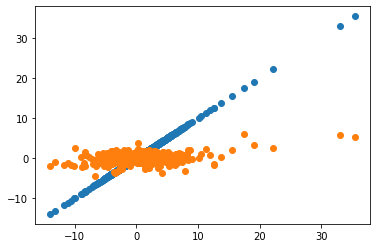

In [20]:
# Returns on the tracking portfolio
Portfolio=df['HML']
MKT=df['Mkt-RF']
Tracking=MKT*results.params[1]

plt.scatter(x=Portfolio,y=Portfolio)
plt.scatter(x=Portfolio,y=Tracking)
plt.show()

We see here the obvious fact that we cannot track at all variation in HML with the market portfolio so the capture very different risks

**Hedged portfolio**

The Hedged strategy return (also called portable alpha) is 

 $$r^{hedged}_i=r^e_i-\beta_ir^{MKT}$$

 * This portoflio can be constructed simply by $W^i-\beta^iW^{MKT}$, the weights of the trading strategy minus the tracking portfolio weights. 
  
 * The excess returns take out risk-free rate effects, and the hedged portfolio takes out market factor effects

A few observations

- The mean return of the hedged portfolio is just the time series alpha!

- The vol of the strategy is the vol of the residuals of the time series regression

- If you run a regression on the market you will see that the hedged portfolios have $\beta=0$, which is by construction. This is the reason why sometimes people call these portfolios "Pure Alpha", or as Bridgwater calls it, "Portable Alpha"

- By construction, because we hedged market risk, the entire SR is enhancing the MV frontier relative to the CAPM


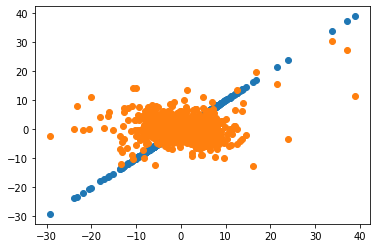

<AxesSubplot:xlabel='Date'>

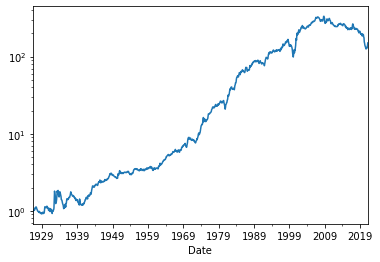

In [35]:
# Returns on the hedged portfolio
Hedged=Portfolio-Tracking
RF=df.RF
plt.scatter(x=MKT,y=MKT)
plt.scatter(x=MKT,y=Hedged)
plt.show()
(Hedged/100+RF/100+1).cumprod().plot(logy=True)


>Insight: The average excess return on the hedged portfolio is the alpha of the unhedged portfolio!
>Intution: The hedged portfolio has mechanically zero beta (in-sample) so it's excess return is "pure" alpha

In [29]:

print('hedge portfolio excess returns')
print(Hedged.mean()*12)
print('alpha of unhedge portfolio')
alpha=results.params[0]
print(alpha*12)


hedge portfolio excess returns
2.7509763704390657
alpha of unhedge portfolio
2.7509763704390675


**Appraisal ratio**

Appraisal ratio is the Sharpe ratio of the hedged portfolio
  
$$Appraisal=AR=\frac{\alpha}{\sigma_e}=\frac{E[r^{Hedged}]}{\sigma(r^{Hedged})},$$
  
  where $\sigma_e$ is the standard deviation of the regression residual

>Appraisal ratio  is key because it tells you how much extra Sharpe ratio relative to the factor you can get by investing in this asset

In [30]:

print(Hedged.mean()/Hedged.std()*12**0.5)
sigma_e=results.resid.std()
print((alpha/sigma_e)*12**0.5)

0.23292739985685582
0.232927399856856


> By how much can you increase your portfolio Sharpe ratio if you combine otpimally the test asset and the refrence portfolio? 

- for any two strategies A and B that have **zero correlation** with each other, you can find the maximum achievable Sharpe Ratio with the simple formula (this is particular case of the math we did in Chapter 10)

$$SR_{final}=\sqrt{SR_{A}^2+SR_{B}^2}$$

- The Hedged and the market are orthogonal by construction--> we took out any beta exposure the asset might have!


$$SR_{final}=\sqrt{SR_{MKT}^2+SR_{Hedged}^2}$$

Or 

$$SR_{final}=\sqrt{SR_{MKT}^2+(\frac{\alpha}{\sigma_e})^2}$$

- This is very general and  can be used any time you run time-series test.

In [34]:
mkt_SR=MKT.mean()/MKT.std()
print('market annualized SR:'+str(mkt_SR*12**0.5))
AR=(alpha/sigma_e)
Final_SR=(mkt_SR**2+AR**2)**0.5
print('market annualized SR:'+str(Final_SR*12**0.5))

market annualized SR:0.4435623135666871
market annualized SR:0.5010016962253798


The gains here are very modest in this case, a 10% increase in the SR. We will see later that these gains were substantially larger when the paper was published. What does that suggest to you?

-----------------------------------------
*Aside:  There is a tight link between the t-stat of the time-series regression and the appraisal ratio*

* Note that is the t-stat was constructed under the assumption that returns are i.i.d., we have

$$\sigma(\alpha)=\frac{\sigma(\epsilon)}{\sqrt{T}}=\frac{\sigma_e}{\sqrt{T}} $$

* Therefore we have
$$
Appraisal=\frac{\alpha}{\sigma_e}
=\frac{\alpha}{\sigma(\alpha)\sqrt{T}}
=\frac{\text{t-stat}}{\sqrt{T}}
$$

_______________

**How to Combine the  Hedged portfolio (alpha) and the Market (beta)**

- Recall our formula for the tangency portfolio weights derived in chapter 10

$$W^*= Var(R^e)^{-1}E[R^e]$$

- Now this becomes really simple because the covariance of the new Hedged-MVE strategy is zero with the market

$$Var(R^e)=\left[\begin{array}{cc} \sigma^2(R_{MKT}^e) & 0\\0 & \sigma^2(R_{Hedged,i})\end{array}\right]$$

- So the optimal weights are just

$$W^* = \left[\begin{array}{c} \frac{E[R^e_{MKT}]}{\sigma^2(R_{MKT}^e)} \\ \frac{\alpha}{\sigma^2(R_{Hedged,i})}\end{array}\right]$$


- You invest in each strategy according to the strength of the risk-return trade-off in the strategy

- Note that anything that invest proportionally in those two assets will still be tangency, i.e. if $W^*$ is tangency $0.3*W^*$ is tangency as well!

- But how much you invest overall will depend on how much risk you want to take





In [46]:
# optimal combination
W=np.array([MKT.mean()/MKT.var(),Hedged.mean()/Hedged.var()])
W

array([0.02394183, 0.01972215])

- Note that the weights are very far from adding up to one
- Thus this portfolio will have small volatility
- One could normalize the eights to add up to on, but that would also be quite arbitrary since the Hedged portfolio is itself a long-short portfolio.
- Below we will calibrate the **leverage** of the strategy to have the same volatility as the market so things are comparable

In [50]:
# calibrating the leverage to match marekt volatility
R=pd.concat([MKT,Hedged],axis='columns')
R.columns=['Mkt-RF','Hedged']
stdW=(W @ R.cov() @ W)**0.5
stdMkt=MKT.std()
W_mktvol=W*(stdMkt/stdW)
W_mktvol

array([0.88535092, 0.72931035])

- You see that the weights add up to way more than one

- This comes from the hedged potrfolio having lower vol than the market

- and the diversification benefits of combining two strategies with zero correlation



In [51]:
R.std()

Mkt-RF    5.348188
Hedged    3.409382
dtype: float64

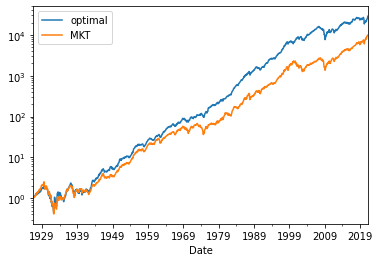

In [52]:
# optimal portfolio returns
Optimalportfolio=W_mktvol[0]*MKT+W_mktvol[1]*Hedged
# adjust optimal portfolio to have the same volatility as the market
(Optimalportfolio/100+RF/100+1).cumprod().plot()
(MKT/100+RF/100+1).cumprod().plot(logy=True)
plt.legend(['optimal','MKT'])
plt.show()

Note that you can side step all this and directly consturct the portfolio by applying the tagency portfolio formula to the two correlated strategies

In [64]:
W=df[['Mkt-RF','HML']].mean()@np.linalg.inv(df[['Mkt-RF','HML']].cov())
# formula for unlevereaged portfolio vol
vol_unlevered=(df[['Mkt-RF','HML']].mean()@np.linalg.inv(df[['Mkt-RF','HML']].cov())@df[['Mkt-RF','HML']].mean())**0.5

W_lev=W*(df['Mkt-RF'].std()/vol_unlevered)
Optimalportfolio2= df[['Mkt-RF','HML']] @ W_lev
print('mean of optimal portfolio consutructed directly from tangency formula')
print(Optimalportfolio2.mean())
print('mean of optimal portfolio consutructed using regression analysis and hedged portfolios')
print(Optimalportfolio.mean())

0.7734909277731046
0.7734909277731046


**Why do the regression analysis then?**

Becasue ofter you will not simply invest mechanically accoridng to the MV framework

You will use the regression to detect alpha and how mcuh the strategy can potentially enhance your sharpe ratio and then use other considerations like the ones we discuss in the followuing chapters to consider how much to allocate

This calculation is useful because it provides a kind of upper bound on the gains you can harvest from the strategy because it is the best you can do if you only care about sharpe ratios. We will discuss more this on the chapter "equilibrium thinking"